#### In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression

In [131]:
boston = load_boston()


In [132]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [133]:
features.shape

(506, 13)

In [134]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [135]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [136]:
#add target prices to bos dataframe
features['PRICE'] = boston.target

In [137]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [138]:
features.PRICE.mean()

22.532806324110698

In [139]:
# Convert the column values of the dataframe as float
float_array = features['PRICE'].values.astype(float)


Normalizing the variable to housing price

In [140]:
# Create min max processing object. Pass the float column to min_max_scalar() whihch scales the dataframe by processing it
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = preprocessing.MinMaxScaler()
scaled_array = min_max_scalar.fit_transform(float_array)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [141]:
# Convert the scaled array to dataframe
df_normalized = pd.DataFrame(scaled_array)
df_normalized.head()

,0
0,0.422222
1,0.368889
2,0.660000
3,0.631111
4,0.693333


In [142]:
features['PRICE'] = df_normalized

In [143]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.422222
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.368889
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.660000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.631111
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.693333


In [144]:
features.fillna('0', inplace=True)

In [145]:
RF = RandomForestRegressor(n_estimators=25)

In [146]:
X = features.drop('PRICE', axis=1)

In [147]:
RF.fit(X, features.PRICE)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [148]:
from sklearn.metrics import accuracy_score, r2_score
r2_score(features.PRICE, RF.predict(X))

0.98227789800953058

In [149]:
Y = features.PRICE

In [150]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size = 0.3,random_state = 3)

In [151]:
RF.fit(X_Train, Y_Train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [152]:
pred_RF_train = RF.predict(X_Train)
pred_RF_test = RF.predict(X_Test)

In [153]:
print(r2_score(Y_Train, pred_RF_train))
print(r2_score(Y_Test, pred_RF_test))

0.981880885596
0.838179726686


In [154]:
pred_RF_test[:5]

array([ 0.76266667,  0.28124444,  0.32444444,  0.58693333,  0.38693333])

In [155]:
Y_Test[:5]

224    0.884444
137    0.268889
453    0.284444
303    0.624444
254    0.375556
Name: PRICE, dtype: float64

In [156]:
pred_RF_train = pred_RF_train[:,None]

In [157]:
trees = range(25)
accuracy = np.zeros(25)

In [158]:
pred_RF_test = pred_RF_test[:, None]

#### Impact of tree size in prediction accuracy

Running of different number of trees and see the effect of that
on accuracy of the prediction

In [163]:
for idx in range(len(trees)):
    regressor = RandomForestRegressor(n_estimators = idx + 1)
    reg = regressor.fit(pred_RF_train, Y_Train)
    predictions = reg.predict(pred_RF_test)
    accuracy[idx] = r2_score(Y_Test, predictions)
    

In [164]:
accuracy

array([ 0.82907782,  0.83025972,  0.8269155 ,  0.83492239,  0.82905207,
        0.83273934,  0.83190957,  0.83014013,  0.8306827 ,  0.83132554,
        0.82982419,  0.82991657,  0.83121307,  0.8323186 ,  0.83169138,
        0.83158924,  0.83305158,  0.83265031,  0.83089628,  0.83132109,
        0.83221501,  0.83145888,  0.83261748,  0.8308527 ,  0.83248728])

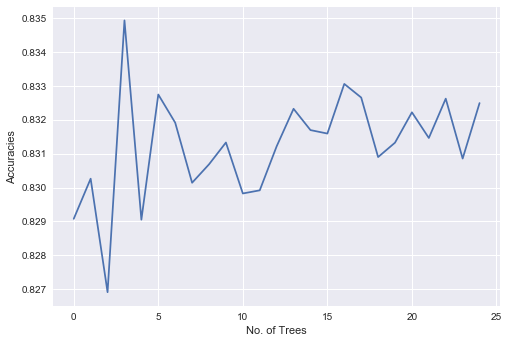

In [167]:
plt.cla()
plt.plot(trees, accuracy)
plt.xlabel('No. of Trees')
plt.ylabel('Accuracies')
plt.show()

#### Conclusion:
     So, in the above graph we can see that almost all the accuracies for each of the 
     25 decision trees taken one by one are almost above 83% which is same as the 
     accuracy score of the predictions made using the Random Forest taking the
     25 decision tree altogether which is also 83%.
    